In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('decimo filtro.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1426 non-null   int64  
 1   CVE_DOC                    1426 non-null   object 
 2   FECHA_DOC                  1426 non-null   object 
 3   NOMBRE_VENDEDOR            1424 non-null   object 
 4   NOMBRE_CLIENTE             1426 non-null   object 
 5   CANT                       1426 non-null   int64  
 6   CVE_ART                    1426 non-null   object 
 7   DESCR                      1426 non-null   object 
 8   PRECIO_UNITARIO            1426 non-null   float64
 9   COSTO_UNITARIO             1426 non-null   float64
 10  COSTO_UNITARIO_CALCULADO   1426 non-null   float64
 11  SUBTOTAL_PARTIDA           1426 non-null   float64
 12  COSTO_TOTAL_CALCULADO      1426 non-null   float64
 13  MARGEN_UNITARIO_CALCULADO  1426 non-null   float

In [14]:
cualitativas = data.iloc[:, [0]]
cuantitativas=data.iloc[:, 8:14]

<Figure size 1500x800 with 0 Axes>

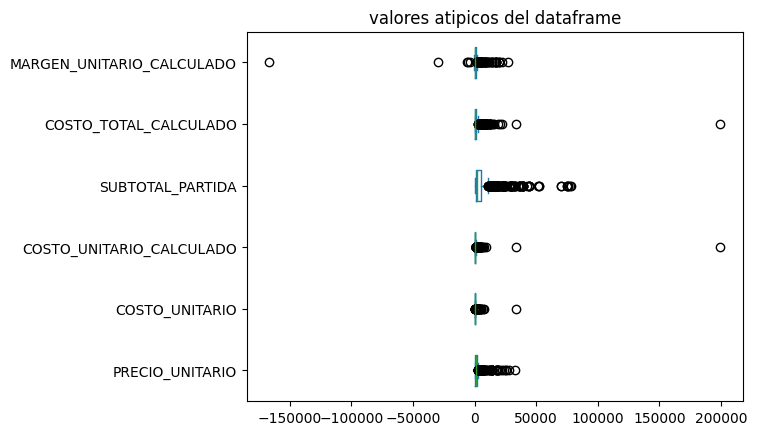

In [16]:
fig= plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box',vert=False)
plt.title('valores atipicos del dataframe')
plt.show() 

In [17]:
y=cuantitativas
limite_superior = y.mean() + 3 * y.std()
limite_inferior = y.mean() - 3 * y.std()
print( "limite superiro permitido", limite_superior)
print( "limite inferior permitido", limite_inferior)


limite superiro permitido PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
dtype: float64
limite inferior permitido PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
dtype: float64


In [18]:
data2=cuantitativas[(y<=limite_superior)&(y>=limite_inferior)]
data2

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,434.48,52.80,52.80,434.48,52.80,381.68
1,1264.05,327.18,327.18,1264.05,327.18,936.87
2,551.61,177.68,177.68,3861.29,1243.73,373.94
3,140.00,38.96,38.96,140.00,38.96,101.04
4,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69
1422,718.60,104.69,104.69,4311.60,628.12,613.91
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49


In [19]:
valores_nulos=data2.isnull().sum()
valores_nulos

PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
dtype: int64

In [20]:
data_clean=data2.copy()
data_clean.fillna(round(data2.mean(),1))
data_clean

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,434.48,52.80,52.80,434.48,52.80,381.68
1,1264.05,327.18,327.18,1264.05,327.18,936.87
2,551.61,177.68,177.68,3861.29,1243.73,373.94
3,140.00,38.96,38.96,140.00,38.96,101.04
4,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69
1422,718.60,104.69,104.69,4311.60,628.12,613.91
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49


In [21]:
y=cuantitativas 

percentile25=y.quantile(0.25)   
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

limite_superior_iqr=percentile75+1.5*iqr
limite_inferior_iqr=percentile25-1.5*iqr
print("limite superior permitido", limite_superior_iqr)
print("limite inferior permitido", limite_inferior_iqr)

limite superior permitido PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
dtype: float64
limite inferior permitido PRECIO_UNITARIO              -927.40375
COSTO_UNITARIO               -340.77000
COSTO_UNITARIO_CALCULADO     -340.87625
SUBTOTAL_PARTIDA            -4946.78750
COSTO_TOTAL_CALCULADO       -1506.25750
MARGEN_UNITARIO_CALCULADO    -621.22375
dtype: float64


In [22]:
data3_iqr=cuantitativas[(y<=limite_superior_iqr)&(y>=limite_inferior_iqr)]  
data3_iqr

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,434.48,52.80,52.80,434.48,52.80,381.68
1,1264.05,327.18,327.18,1264.05,327.18,936.87
2,551.61,177.68,177.68,3861.29,1243.73,373.94
3,140.00,38.96,38.96,140.00,38.96,101.04
4,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69
1422,718.60,104.69,104.69,4311.60,628.12,613.91
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,NaN,NaN,NaN,5909.84,1884.35,NaN


In [23]:
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

PRECIO_UNITARIO              127
COSTO_UNITARIO               128
COSTO_UNITARIO_CALCULADO     144
SUBTOTAL_PARTIDA             159
COSTO_TOTAL_CALCULADO        162
MARGEN_UNITARIO_CALCULADO    132
dtype: int64

In [24]:
data4_iqr=data3_iqr.copy()
data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,434.48,52.80,52.80,434.48,52.80,381.68
1,1264.05,327.18,327.18,1264.05,327.18,936.87
2,551.61,177.68,177.68,3861.29,1243.73,373.94
3,140.00,38.96,38.96,140.00,38.96,101.04
4,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69
1422,718.60,104.69,104.69,4311.60,628.12,613.91
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,NaN,NaN,NaN,5909.84,1884.35,NaN


In [25]:
datos_limpios=pd.concat([cualitativas,data4_iqr],axis=1)    
datos_limpios

,Unnamed: 0,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,0,1,434.48,52.80,52.80,434.48,52.80,381.68
1,1,1,1264.05,327.18,327.18,1264.05,327.18,936.87
2,2,7,551.61,177.68,177.68,3861.29,1243.73,373.94
3,3,1,140.00,38.96,38.96,140.00,38.96,101.04
4,4,2,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...,...,...
1421,1421,6,712.00,102.31,102.31,4272.00,613.88,609.69
1422,1422,6,718.60,104.69,104.69,4311.60,628.12,613.91
1423,1423,3,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,1424,1,NaN,NaN,NaN,5909.84,1884.35,NaN


In [26]:
datos_limpios.to_csv('Ventas_totales_filtrado_limpio.csv')